# 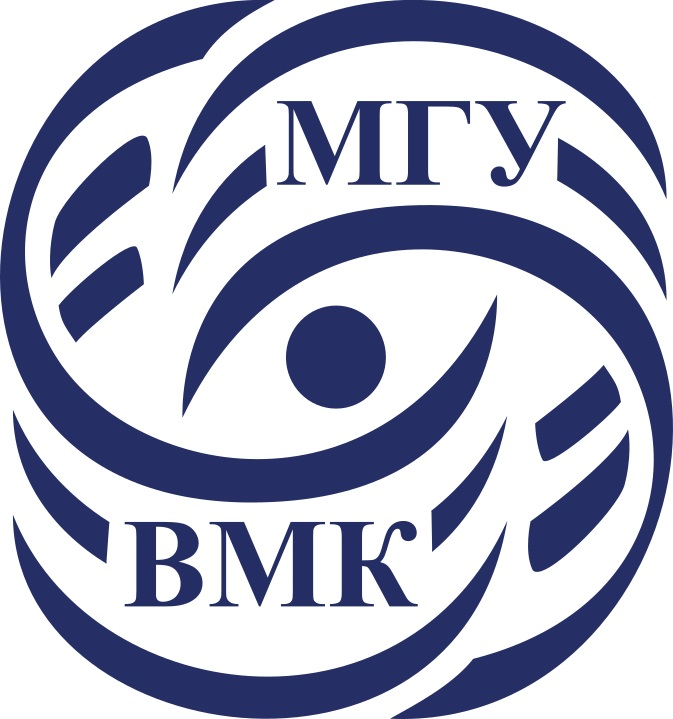

# Машинное обучение. ВМК МГУ

# Практическое задание 2. Knn: классификация и регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.19MB/s]


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.7')


<font color='OrangeRed'>**Внимание!**</font> Перед выполнение данного задания рекомендуем сначала погрузиться в [Base] ноутбук по основам sklearn, нормализации и кросс-валидации, так как данные техники и понятия будут активно использоваться в данном ноутбук

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 1. Нормализация признакового пространства

В данном части задания исследуем, как нормализация (скейлинг) данных влияет на разделимость данных

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [5]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 10.1MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [6]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [7]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

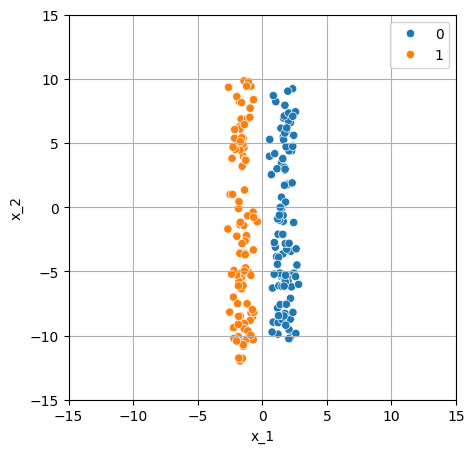

In [8]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [9]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

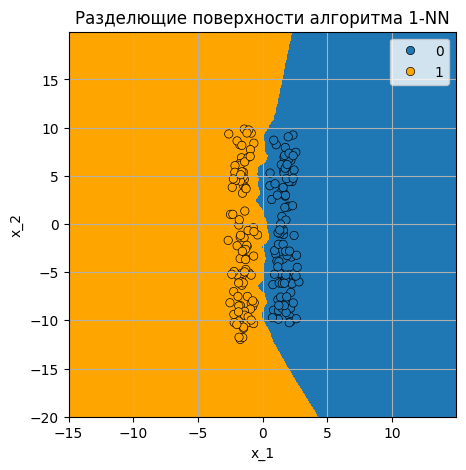

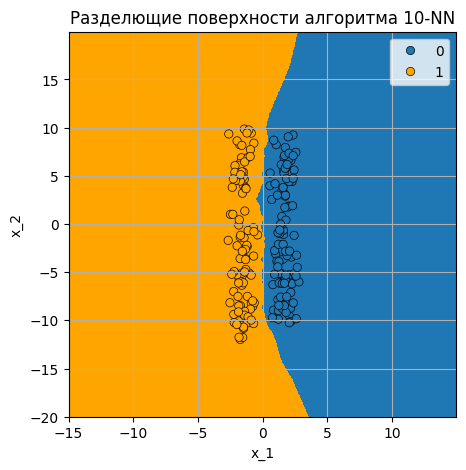

In [10]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

## <font color='DarkOrange'>**Задание 1.1 (кросс-проверка, 1,5 балла)**</font>

 Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте <font color='OrangeRed'>**строгое математическое обоснование**</font> наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией (скейлингом) признаков.

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Разброс данных по оси $x_2$ больше, чем разброс данных по оси $x_1$. При $|x| > 10$ больший вклад вносят точки класса 1, поскольку они расположены выше (ниже) при $x > 10$ $(x < -10)$ точек класса 0. <br>

В евклидовом пространстве $$r(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$$
Это означает, что вклад каждого признака ($x_1, x_2$) в метрику расстояния зависит от его разброса. Если один признак (например, $x_2$) имеет значительно больший диапазон значений по сравнению с другим признаком (например, $x_1$), это приводит к тому, что модель будет "предпочитать" более значимый признак при определении разделяющей поверхности. Нормализация позволяет привести все признаки к единому масштабу, что обеспечивает равный вклад каждого признака в метрику расстояния. Таким образом, отклонение разделяющей поверхности от оси $x_1 = 0$ будет уменьшено.

---

## <font color='DarkOrange'>**Задание 1.2 (кросс-проверка, 2 балла)**</font>


 Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется <font color='OrangeRed'>**математически строго, однозначно и с полным обоснованием**</font> определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

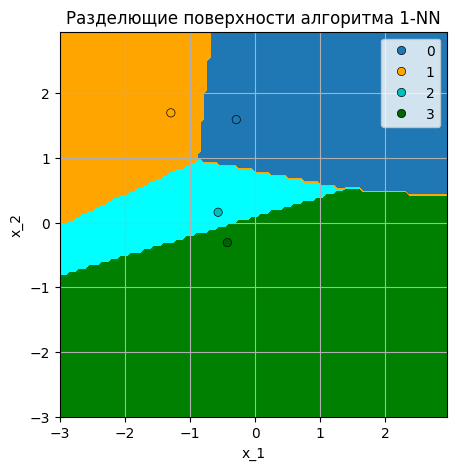

In [11]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Разделяющая поверхность в данном случае представляет собой геометрическое место точек, находящихся на равном расстоянии от двух ближайших точек. Это можно выразить уравнением $r(x, x_1) = r(x, x_2)$, где $r(x, y)$ - расстояние от точки $x$ до ближайшей точки $y$.

Для двух точек $x_1 $ и $x_2$ уравнение разделяющей поверхности можно записать как <br>
$\sum_{i=1}^{n} (x_i - x_{1i})^2 = \sum_{i=1}^{n} (x_i - x_{2i})^2$, где
$n$ — размерность пространства, $x_i$ — координаты точки $x$.

Преобразуем: <br>

$\sum_{i=1}^{n} \left( x_i^2 - 2x_ix_{1i} + x_{1i}^2 \right) = \sum_{i=1}^{n} \left( x_i^2 - 2x_ix_{2i} + x_{2i}^2 \right)$

$-2 \sum_{i=1}^{n} x_ix_{1i} + \sum_{i=1}^{n} x_{1i}^2 = -2 \sum_{i=1}^{n} x_ix_{2i} + \sum_{i=1}^{n} x_{2i}^2$

$\sum_{i=1}^{n} \left( x_{2i}^2 - x_{1i}^2 \right) = 2 \sum_{i=1}^{n} x_ix_{1i} - 2 \sum_{i=1}^{n} x_ix_{2i}$

$\sum_{i=1}^{n} (x_{2i} - x_{1i}) \cdot (x_i - m) = 0$, где $m = \frac{x_{1i} + x_{2i}}{2}$

Это уравнение показывает, что разделяющая поверхность является объединением гиперплоскостей, которые ортогональны отрезку, соединяющему ближайшие две точки, и проходят через его середину.

# Часть 2. Кросс-валидация

Чтобы закрепить понимание устройства кросс-валидации предлагаем вам запрограммировать данный метод самостоятельно

## <font color='DarkOrange'>**Задание 2.1 (unit-tests, 3 балла)**</font>

 В модуле `cross_val.py` реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике.

- В качестве метрики качества будем использовать $accuracy\_score$.

<font color='CornflowerBlue'>**Accuracy**</font> - это доля верно классифицированных объектов, среди всех объектов выборки.

In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [14]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [15]:
X_train = np.array(X_train, dtype=object)

In [16]:
X_test = np.array(X_test, dtype=object)

In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* <font color='plum'>**Токенизация.**</font> Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* <font color='plum'>**Нормализация.**</font> Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* <font color='plum'>**Векторизация.**</font> Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации.

* Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа.

*  Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ предлагаем изучить самостоятельно, например, [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

<font color='MediumTurquoise'>**Полезные ссылки**</font>

Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В `sklearn` все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [18]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

## <font color='DarkOrange'>**Задание 3.1 (кросс-проверка, 0,5 баллa)**</font>

 Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке.

 - Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [19]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [23]:
from cross_val import kfold_split, knn_cv_score

folds = kfold_split(len(X_train), 3)
score = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, neighbors.KNeighborsClassifier)

## <font color='DarkOrange'>**Задание 3.2 (кросс-проверка, 0,5 балл)**</font>

 Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [24]:
tfidf_scores = []
count_scores = []

for item in score:
    if item[0] == 'TfidfVectorizer':
        tfidf_scores.append(score[item])
    else:
        count_scores.append(score[item])

tfidf_mean = np.mean(tfidf_scores) if tfidf_scores else 0
count_mean = np.mean(count_scores) if count_scores else 0

print("Mean TfidfVectorizer score: ", tfidf_mean)
print("Mean CountVectorizer score: ", count_mean)

Mean TfidfVectorizer score:  0.6626436330298413
Mean CountVectorizer score:  0.6387355353440083


In [25]:
optimal_param = max(score.items(), key=lambda item: item[1])
print("Optimal parameters and its score:", optimal_param)

Optimal parameters and its score: (('TfidfVectorizer', 1, 'cosine', 'uniform'), 0.6936529067480152)


<font color='MediumOrchid'>**Ваш ответ тут:**</font> TfidfVectorizer (Term Frequency-Inverse Document Frequency) в среднем дает наилучший результат, потому что TfidfVectorizer в отличие от CountVectorizer учитывает как частоту вхождений (TF) в конкретном документе, так и важность слов для всей выборки (IDF), что позволяет выделять более значимые термины, которые могут лучше характеризовать содержание документа. <br>

Оптимальные параметры: 'TfidfVectorizer', 1, 'cosine', 'uniform'

## <font color='DarkOrange'>**Задание 3.3 (кросс-проверка, 1 балл)**</font>

 Начертите график (line plot) зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параметрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

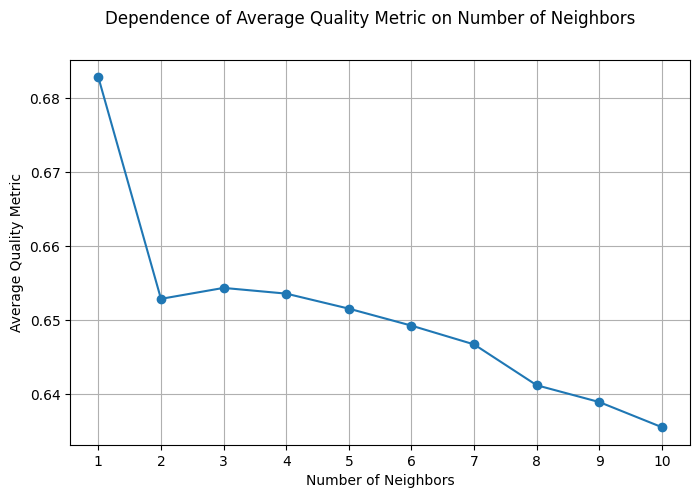

In [26]:
neighbor_metrics = {}

for i in score:
    if i[1] in neighbor_metrics.keys():
        neighbor_metrics[i[1]].append(score[i])
    else:
        neighbor_metrics[i[1]] = [score[i]]

for i in neighbor_metrics:
    neighbor_metrics[i] = np.mean(neighbor_metrics[i])

plt.figure(figsize=(8, 5))
plt.plot(neighbor_metrics.keys(), neighbor_metrics.values(), marker='o')
plt.xticks(range(1, 11))
plt.ylabel("Average Quality Metric")
plt.xlabel("Number of Neighbors")
plt.suptitle("Dependence of Average Quality Metric on Number of Neighbors")
plt.grid(True)
plt.show()

In [27]:
class_names = fetch_20newsgroups(subset='train').target_names

for index, label in enumerate(y_train[:20]):
    print(f"Class {label}: {class_names[label]}")

Class 7: rec.autos
Class 4: comp.sys.mac.hardware
Class 4: comp.sys.mac.hardware
Class 1: comp.graphics
Class 14: sci.space
Class 16: talk.politics.guns
Class 13: sci.med
Class 3: comp.sys.ibm.pc.hardware
Class 2: comp.os.ms-windows.misc
Class 4: comp.sys.mac.hardware
Class 8: rec.motorcycles
Class 19: talk.religion.misc
Class 4: comp.sys.mac.hardware
Class 14: sci.space
Class 6: misc.forsale
Class 0: alt.atheism
Class 1: comp.graphics
Class 7: rec.autos
Class 12: sci.electronics
Class 5: comp.windows.x


<font color='MediumOrchid'>**Ваш ответ тут:**</font> <br>
График показывает тенденцию к снижению усредненной метрики качества по мере увеличения числа соседей.

В данных представлены различные классы, например, технические темы и социальные вопросы. При увеличении числа соседей модель учитывает больше объектов из разных классов, что может привести к смешиванию информации. Это особенно критично для менее представленных классов, которые могут быть "поглощены" более частыми, что приводит к игнорированию важных особенностей редких классов и снижению точности классификации.

## <font color='DarkOrange'>**Задание 3.4 (кросс-проверка, 1,5 баллa)**</font>

 Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [34]:
from sklearn.neighbors import KNeighborsClassifier

tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf.fit(X_train)

X_train_transformed = tf_idf.transform(X_train)
X_test_transformed = tf_idf.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='cosine')

knn_model.fit(X_train_transformed, y_train)

y_pred = knn_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.53


In [35]:
import pandas as pd

train_count = pd.Series(y_train).value_counts().sort_values(ascending=False)
train_keys, train_values = train_count.index.to_numpy(), train_count.values

print(train_count)

10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: count, dtype: int64


In [36]:
test_count = pd.Series(y_test).value_counts().sort_values(ascending=False)
test_keys, test_values = test_count.index.to_numpy(), test_count.values

print(test_count)

10    399
15    398
8     398
9     397
7     396
11    396
13    396
5     395
14    394
2     394
12    393
3     392
6     390
1     389
4     385
17    376
16    364
0     319
18    310
19    251
Name: count, dtype: int64


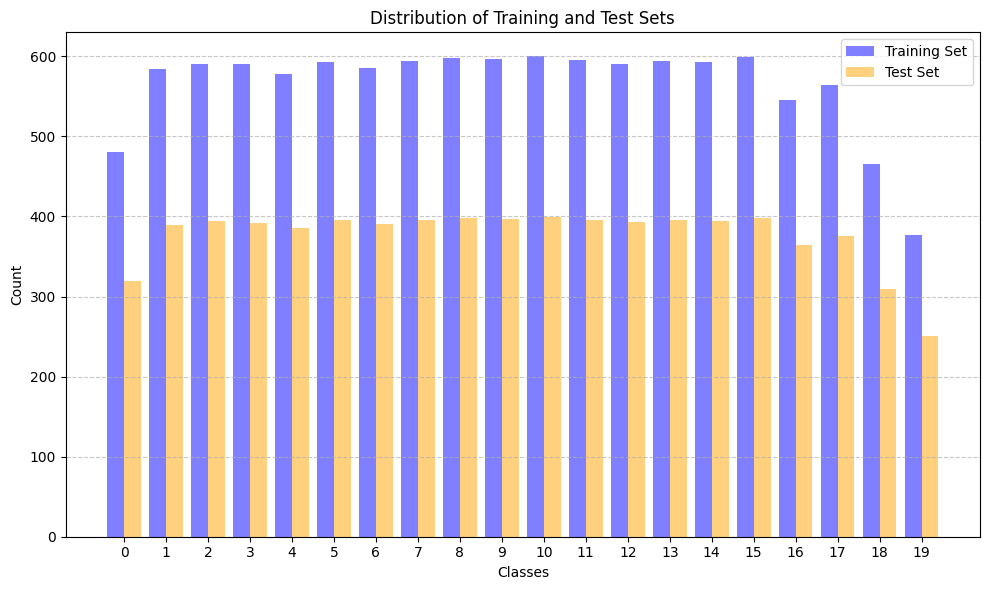

In [37]:
classes = np.arange(20)

train_values = [train_count.get(i, 0) for i in classes]
test_values = [test_count.get(i, 0) for i in classes]

plt.figure(figsize=(10, 6))

plt.bar(classes - 0.2, train_values, width=0.4, color='blue', alpha=0.5, label='Training Set')
plt.bar(classes + 0.2, test_values, width=0.4, color='orange', alpha=0.5, label='Test Set')

plt.title('Distribution of Training and Test Sets')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(classes)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [38]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(y_train, y_test)

alpha = 0.05

if p_value > alpha:
    print(f"The distributions do not differ at the significance level of {alpha:.2f}.")
else:
    print(f"The distributions differ at the significance level of {alpha:.2f}.")

print(f"Mean for Train: {np.mean(y_train)}, Variance: {np.var(y_train)}")
print(f"Mean for Test: {np.mean(y_test)}, Variance: {np.var(y_test)}")

The distributions do not differ at the significance level of 0.05.
Mean for Train: 9.29299982322786, Variance: 30.941108855046814
Mean for Test: 9.293414763674987, Variance: 30.94603735691427


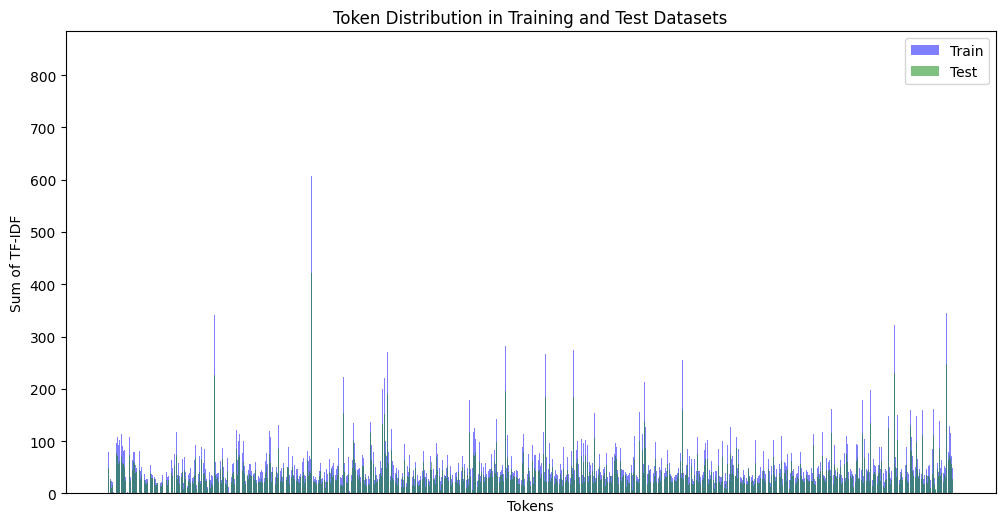

The distributions differ at the significance level of 0.05.


In [43]:
train_sum = np.asarray(X_train_transformed.sum(axis=0)).flatten()
test_sum = np.asarray(X_test_transformed.sum(axis=0)).flatten()

tokens = tf_idf.get_feature_names_out()

plt.figure(figsize=(12, 6))
plt.bar(tokens, train_sum, alpha=0.5, label='Train', color='b')
plt.bar(tokens, test_sum, alpha=0.5, label='Test', color='g')

plt.xticks([])
plt.xlabel('Tokens')
plt.ylabel('Sum of TF-IDF')
plt.title('Token Distribution in Training and Test Datasets')
plt.legend()
plt.show()

statistic, p_value = ks_2samp(train_sum, test_sum)
alpha = 0.05

if p_value > alpha:
    print(f"The distributions do not differ at the significance level of {alpha:.2f}.")
else:
    print(f"The distributions differ at the significance level of {alpha:.2f}.")

<font color='MediumOrchid'>**Ваш ответ тут:**</font> <br>
Точность на кросс-валидации 0.6937, точность на тестовой выборке 0.53.

В обучающей выборке количество экземпляров каждого класса варьируется от 377 до 600, тогда как в тестовой выборке — от 251 до 399. Нормализация тестовых данных проводилась с использованием `tf_idf.fit(X_train)`, что может привести к неточным результатам, поскольку статистические параметры (среднее и стандартное отклонение) рассчитываются только на основе обучающей выборки. Это означает, что нормализация тестовой выборки не учитывает ее собственное распределение.

Существует статистически значимое различие между распределениями значений TF-IDF токенов в обучающей и тестовой выборках. Характеристики данных, использованных для обучения модели, не совпадают с характеристиками данных, использованных для оценки её производительности.

В результате кросс-валидации была выбрана модель с количеством соседей k = 1. И хотя такая модель может демонстрировать высокую точность на обучающих данных, она склонна к переобучению.

# <font color='MediumSeaGreen'>**Бонус [0,5 балла]**</font>

 Вставьте мем, описывающий ваше состоянии после решения данного ноутбука

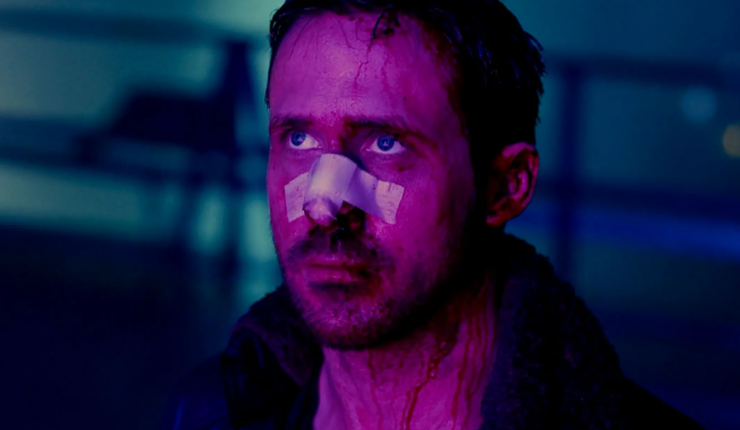